In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('/content/Sales_add.csv')

In [4]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [5]:
data.describe()


,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [6]:
import statistics as stat

In [8]:
stat.mean(data['Sales_before_digital_add(in $)'])

149239.95454545456

# **Two Sample Z-Test**


In [10]:
from statsmodels.stats.weightstats import ztest


Null Hypotesis :- Increase in sales.
Alternate Hypotesis :- No increase in sales.

In [12]:
z_stats, p_val = ztest(data['Sales_before_digital_add(in $)'], data['Sales_After_digital_add(in $)'], value = 0)

In [14]:
 p_val 

1.3046367348248653e-38

In [16]:
if p_val < 0.05:
  print('Null Hypothesis is Rejected')
else:
  print('Null Hypothesis is Accepted')

Null Hypothesis is Rejected


# **Chi Square Test**

In [18]:
from scipy.stats import chi2_contingency

In [21]:
dat = [data['Region'], data['Manager']]

Null Hypotesis :- Dependance Exist.
Alternate Hypotesis :- Dependance donot exist.

In [23]:
chi2_stat, p_val, dof, exp = chi2_contingency(dat)

TypeError: ignored

# **Corelation between Region And Manager**

In [24]:
contingency = pd.crosstab(data['Region'], data['Manager'])

In [25]:
contingency 


Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


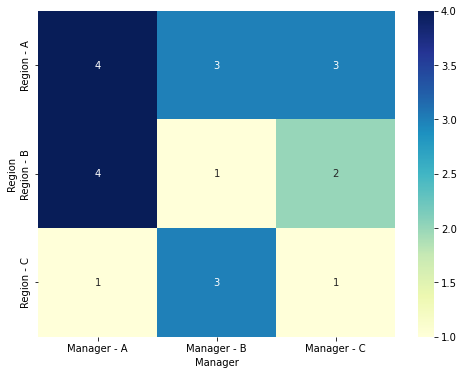

In [27]:
plt.figure(figsize = (8,6))
sns.heatmap(contingency, annot = True, cmap = 'YlGnBu')